In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
class PIDController:
    def __init__(self, Kp, Ki, Kd, K=1):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.K = K
        self.prev_error = 0
        self.sum_error = 0

    def update(self, x, setpoint, dt):
        error = setpoint - x
        error_p = error * self.Kp
        error_i = self.sum_error + error * self.Ki * dt
        error_d = self.Kd * (error - self.prev_error) / dt

        control = error_p + error_i + error_d

        self.prev_error = error
        self.sum_error = error_i

        return control * self.K

In [3]:
# test PID
n = 1000
start_y = 0
end_y = 1
path_y = np.linspace(start_y, end_y, n)
path_x = np.zeros(n)



(0.0, 1.0)

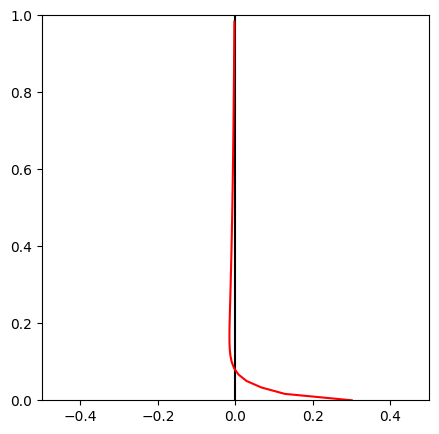

In [12]:
Kp, Ki, Kd = 0.5, 1, 0.001
start_x = 0.3
vy = 1/60


PID = PIDController(Kp, Ki, Kd, 1)
x = start_x
xs = [start_x]
ys = [start_y]
# start path tracking
while True:
    y = ys[-1] + vy
    if y >= end_y:
        break
    
    target_x = np.interp(y, path_y, path_x)
    control = PID.update(x, target_x, vy)
    x += control
    # x, error, _ = pid_assistance(x, target_x, errors[-1], np.array(errors).sum(), Kp, Ki, Kd)

    xs.append(x)
    ys.append(y)

# plot 
plt.figure(figsize=(5, 5))
plt.plot(path_x, path_y, 'k')
plt.plot(xs, ys, 'r')
plt.xlim([-0.5, 0.5])
plt.ylim([0, 1])
